In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
import xgboost
from xgboost import XGBClassifier
import gc


In [2]:
train=pd.read_csv("../input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.dtypes#checking data types

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#checking for misssing values
print(train.isnull().values.any())

True


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#lets check the %percentage of missing values
print(train["Cabin"].isnull().sum()/len(train["Cabin"])*100,"% missing of cabin")
print(train["Age"].isnull().sum()/len(train["Age"])*100,"% missing of Age")
print(train["Embarked"].isnull().sum()/len(train["Embarked"])*100,"% missing percentage of Embarked")


77.10437710437711 % missing of cabin
19.865319865319865 % missing of Age
0.22446689113355783 % missing percentage of Embarked


# **Observations:**
* we can observe that 77 %of data is ,missing ,so its better to drop
* embarked missing value is very less ,so can be removd as it will not impact 
* age can be filled with mean or median

In [10]:
train.dropna(subset=["Embarked"],axis=0,inplace=True)
train.drop("Cabin",axis=1,inplace=True)
train["Age"].fillna(value=train["Age"].median(),inplace=True)

In [11]:
train.isnull().values.any()

False

# **Univariate analysis**

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'Todoro

<Figure size 720x360 with 0 Axes>

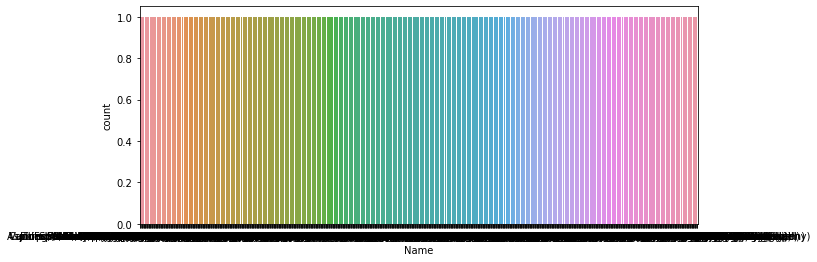

<Figure size 720x360 with 0 Axes>

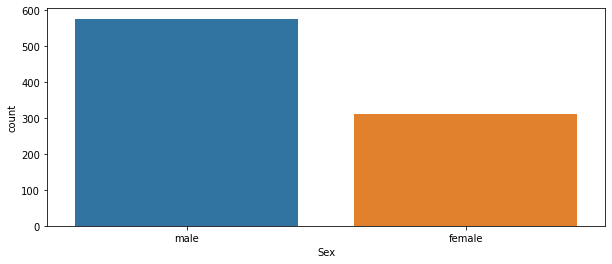

<Figure size 720x360 with 0 Axes>

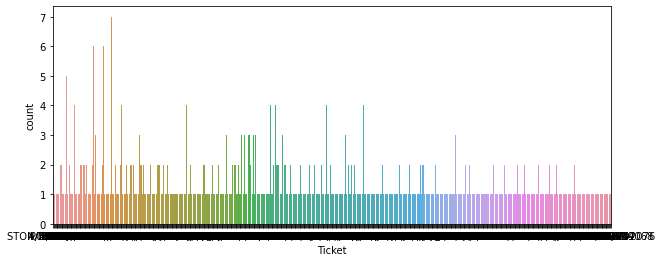

<Figure size 720x360 with 0 Axes>

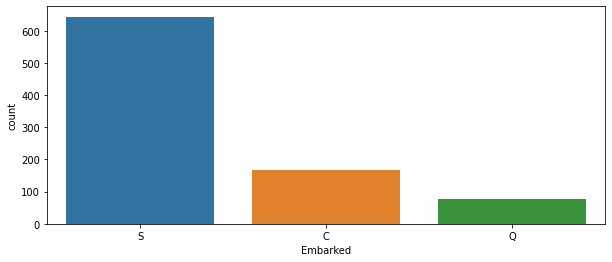

In [12]:
#categorial data
for i in train.select_dtypes("object"):
    plt.figure(figsize=(10,5))
    print(train[i].unique())
    print("\n")
    print(len(train[i].unique()),"is count of unique_values of {}".format(i))
    print("\n")
    print(train[i].value_counts())
    plt.figure(figsize=(10,4))
    sns.countplot(train[i])
    print("-------------------------------------------------------------------------------------------------------------")
    

 # **Observations:**
* More males bought tickets of the titanic ship
* Passengers were more on Southampton

<AxesSubplot:xlabel='Ticket', ylabel='count'>

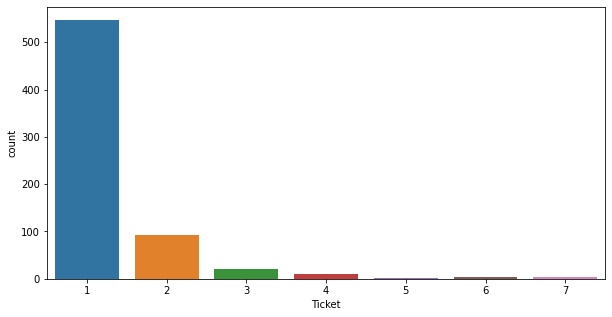

In [13]:
#lets more explore to ticket number
plt.figure(figsize=(10,5))
sns.countplot(train["Ticket"].value_counts())
#observed that many people traveled alone as they were having the unique ticket numbers

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 24

<Figure size 720x360 with 0 Axes>

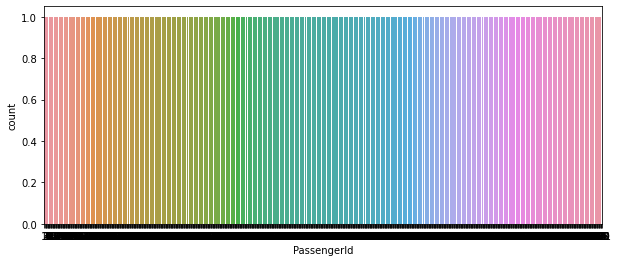

<Figure size 720x360 with 0 Axes>

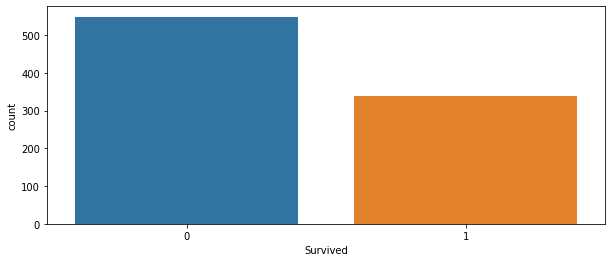

<Figure size 720x360 with 0 Axes>

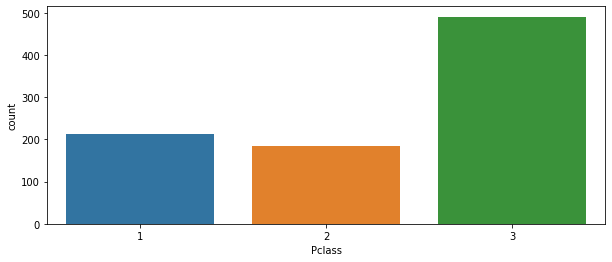

<Figure size 720x360 with 0 Axes>

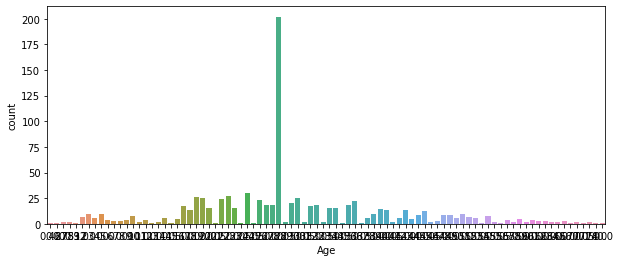

<Figure size 720x360 with 0 Axes>

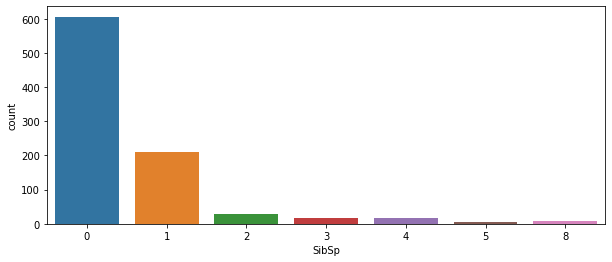

<Figure size 720x360 with 0 Axes>

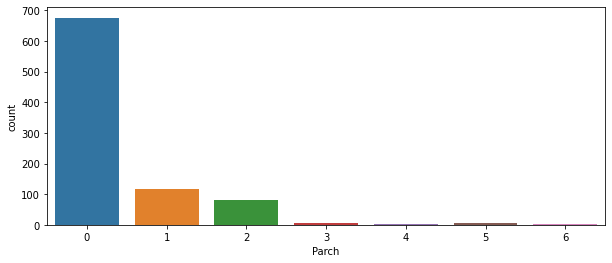

<Figure size 720x360 with 0 Axes>

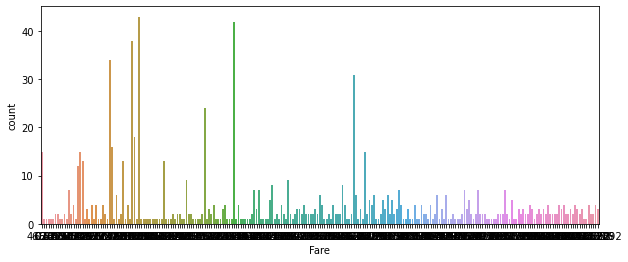

In [14]:
#numeric data
for i in train.select_dtypes(np.number):
    plt.figure(figsize=(10,5))
    print(train[i].unique())
    print("\n")
    print(len(train[i].unique()),"is count of unique_values of {}".format(i))
    print("\n")
    print(train[i].value_counts())
    plt.figure(figsize=(10,4))
    sns.countplot(train[i])
    print("-------------------------------------------------------------------------------------------------------------")
    

# **Observations:**
* More people lost their life on titanic compared to survived
* More number of people were in 3rd class 
* We can observe that more count of people boarded the titanic alone,second in counting is the people who teaveled with spouse or sibling
* Most of passengers travled with out children 


{'whiskers': [<matplotlib.lines.Line2D at 0x7f11f0d06390>,
 'caps': [<matplotlib.lines.Line2D at 0x7f11f0645890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f11f0d06890>],
 'medians': [<matplotlib.lines.Line2D at 0x7f11f0632190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f11f06325d0>],
 'means': []}

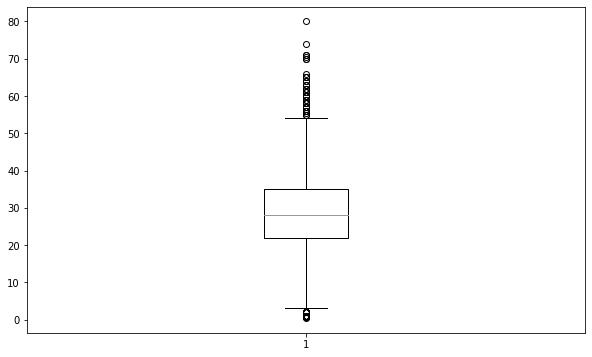

In [15]:
#lets more explore age groups and fare
plt.figure(figsize=(10,6))
plt.boxplot(x=train["Age"])

#people who boarded titanic were more of between 22-35 years and we can also observe some outliers as well

(0.0, 100.0)

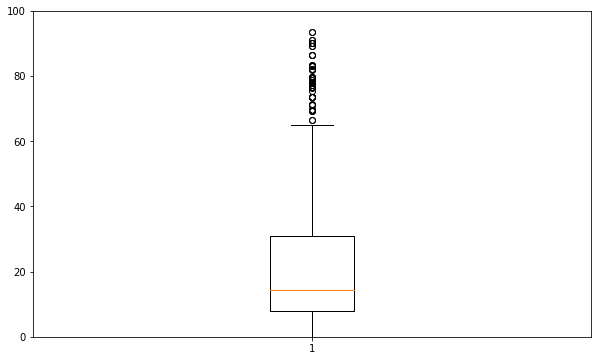

In [16]:
plt.figure(figsize=(10,6))
plt.boxplot(train["Fare"],)
#we can observe tha mosly low price tickets were sold may be that might be of 3rd class
#may prices of 1 st class will be more
plt.ylim(0,100)
#more tickets were sold of cost between 10-35,some outliers can be observed as well

<AxesSubplot:xlabel='Survived', ylabel='count'>

<Figure size 720x432 with 0 Axes>

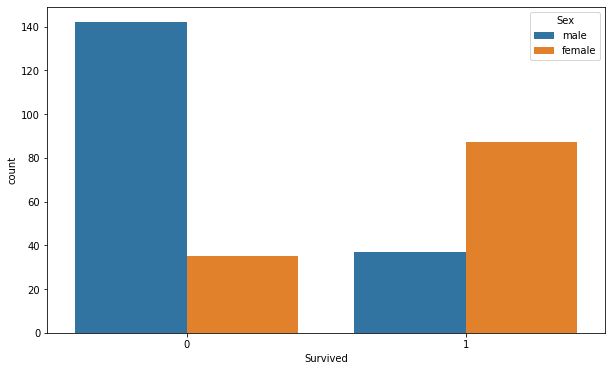

In [17]:
#Lets divide the age group and see which age group survived moredf
youngster=train[train["Age"]<=25]
plt.figure(figsize=(10,6))
plt.figure(figsize=(10,6))
sns.countplot(youngster["Survived"],hue=train["Sex"])
#we see that amoung more females survived compared to males,may be males could have helped females on priority

<AxesSubplot:xlabel='Survived', ylabel='count'>

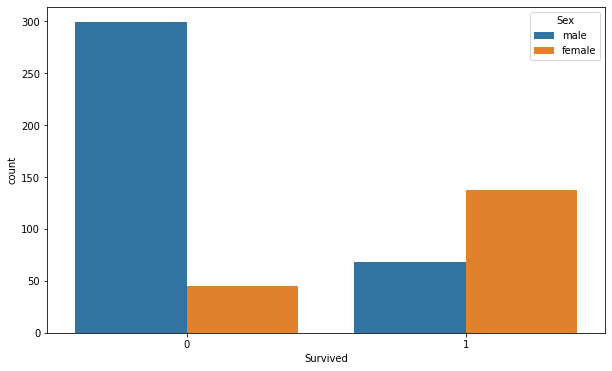

In [18]:
middle_age=train[(train["Age"]>25) & (train["Age"]<=55)]
plt.figure(figsize=(10,6))
sns.countplot(middle_age["Survived"],hue=train["Sex"])
#more number of deaths observed among male in this age category vice versa for female

<AxesSubplot:xlabel='Survived', ylabel='count'>

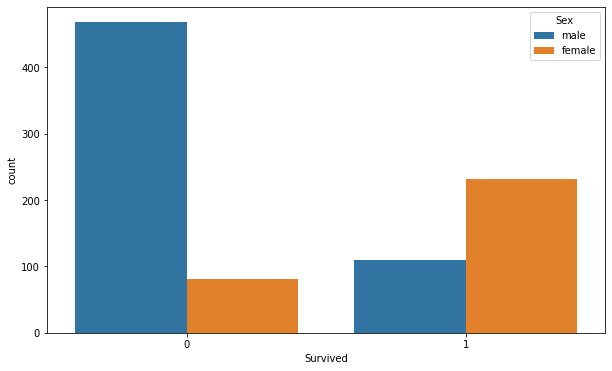

In [19]:
old_people=train[train["Age"]>55]
plt.figure(figsize=(10,6))
sns.countplot(train["Survived"],hue=train["Sex"])
#among males maximum died males were of  more than 55 and maximum women survived were of more than 55

<AxesSubplot:>

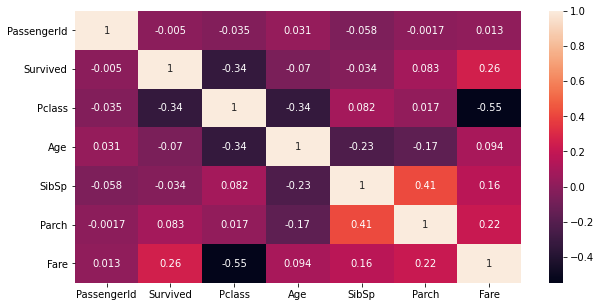

In [20]:
#checking correlation
train.corr()
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(),annot=True)
#we can observe that no such high correlations are there 

# **Bivariate Analysis**

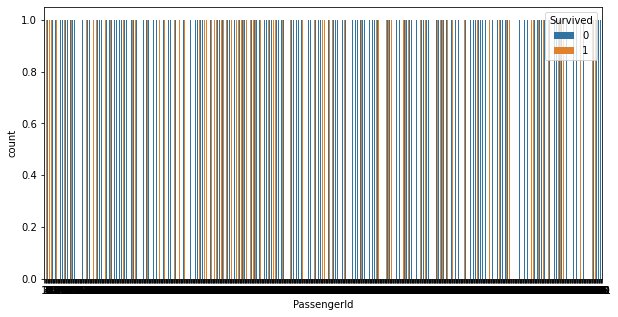

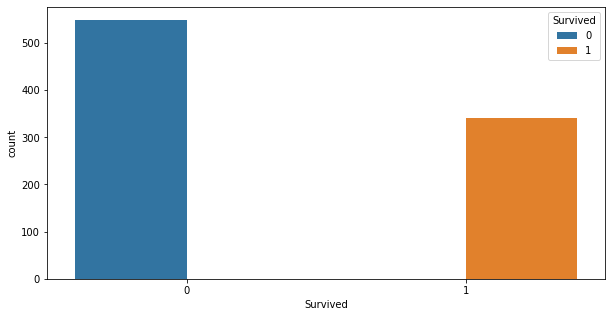

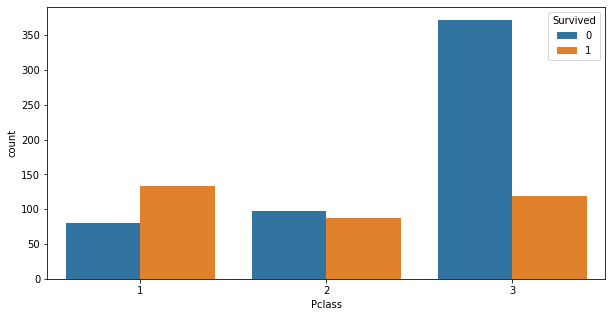

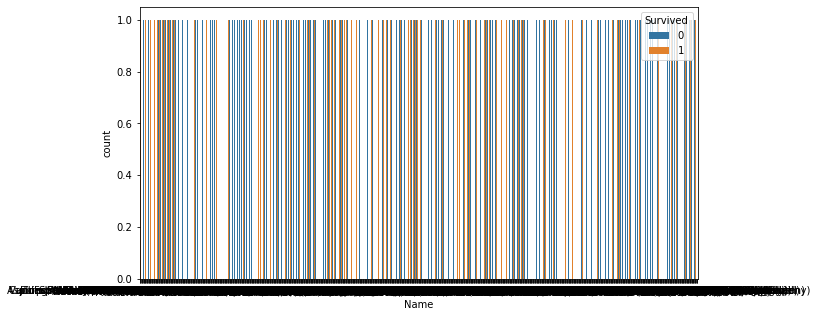

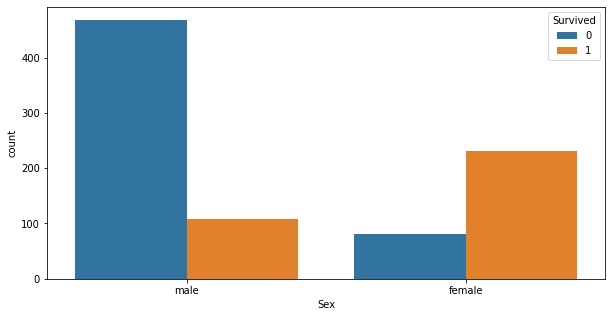

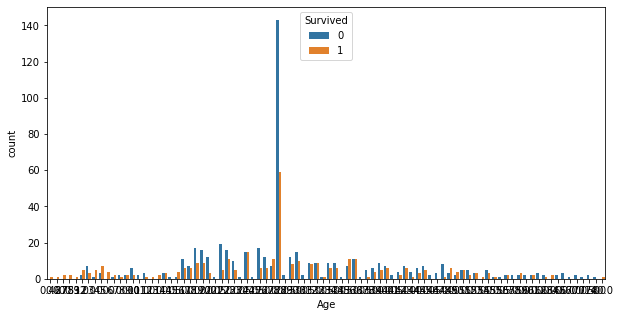

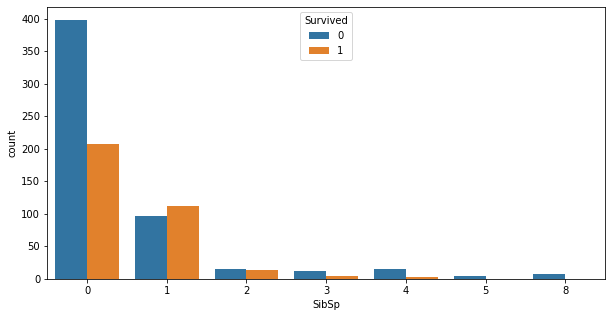

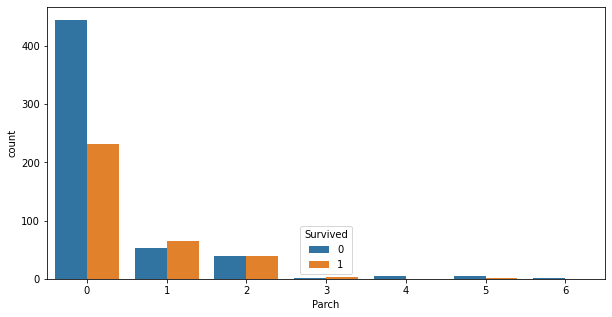

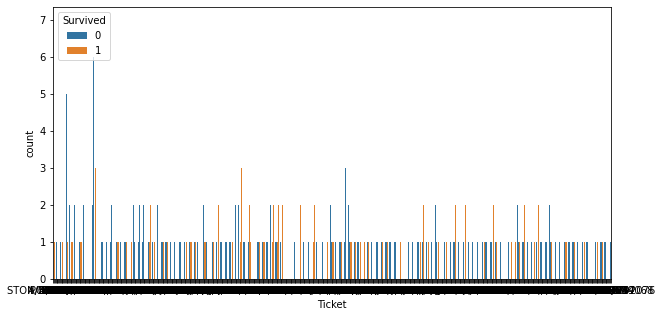

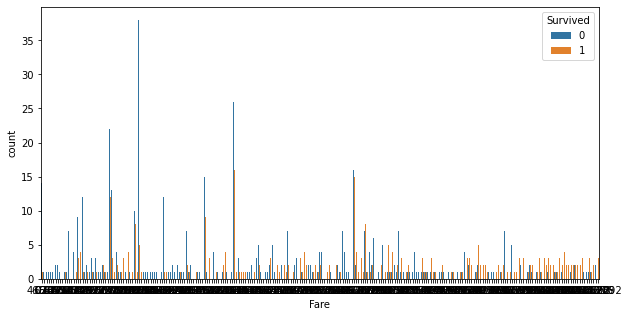

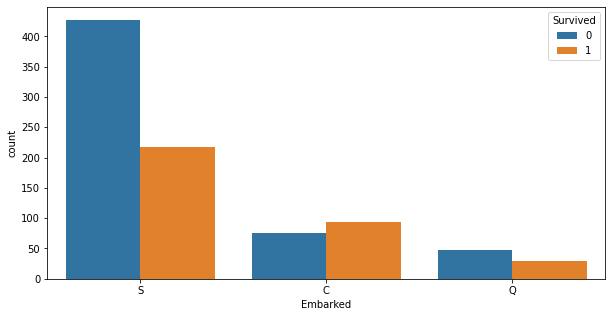

In [21]:
for i in train.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(train[i],hue=train["Survived"],)
    
    
       

# **Observations:**
* More people survived who were in 1st class compared to others and in count more people who traveled in 3rd class lost their life
* More females survived compared to male ,may be males were trying to save females first
* We can observe that people were trying to save their spouse or sibling
* More people who traveld alone saved their life compared to ones who were traveling with parents and children,since  a family man has menatality of saving his family first
* More people who were in southhamton survived

<AxesSubplot:title={'center':'Age'}, xlabel='Survived'>

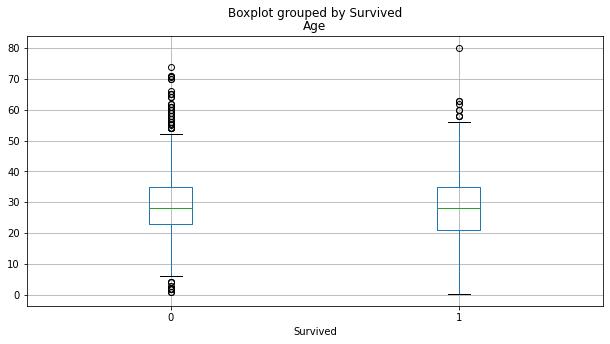

In [22]:
#lest anaysize age and fare factror more

train.boxplot(column="Age",by="Survived",figsize=(10,5))


<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

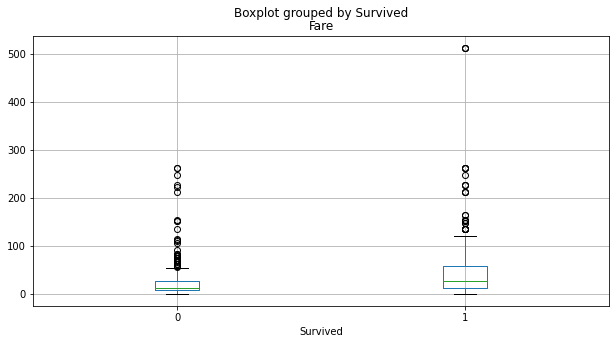

In [23]:
train.boxplot(column="Fare",by="Survived",figsize=(10,5))

# **Observation:**
    1.More People between 21-35 age group survived as well as almost people of same age group lost their life majorly.
    2.We can observe that people who have paid more survived more on titanic ,but there are outliers too in both the cases.
    

# **Multivariate Analysis**

<AxesSubplot:xlabel='Survived', ylabel='Age'>

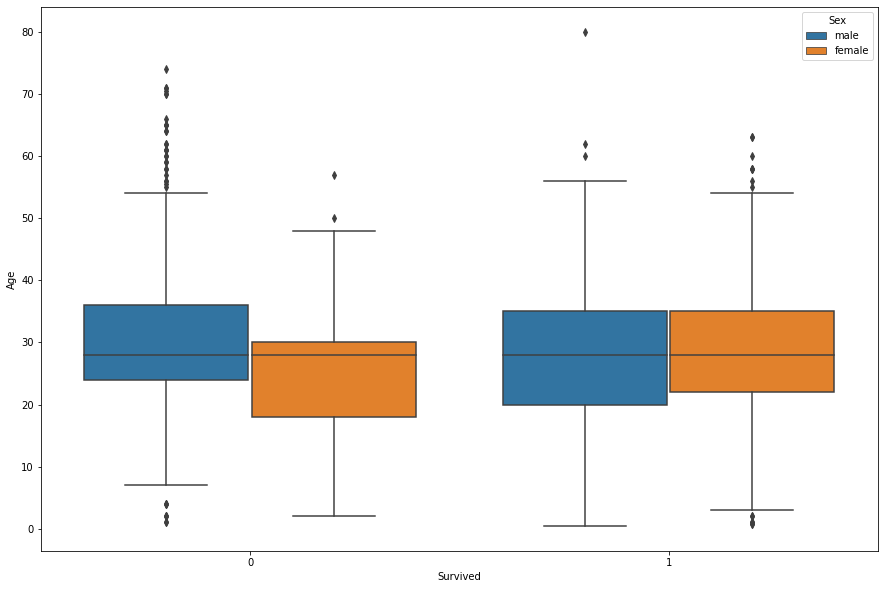

In [24]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Survived",y="Age",data=train,hue="Sex")
#we can observe that amonng females 21-38 age group survived and might be they were spouse wand most females who lost there life belonged to 
#17-28 age group may be they visted alone 
#among males 20-34 age group survived more.may be they visited alone and they didnt had a spouse or family to save 
#and males who age group between 23-35 lost life ,may be they saved their family first

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

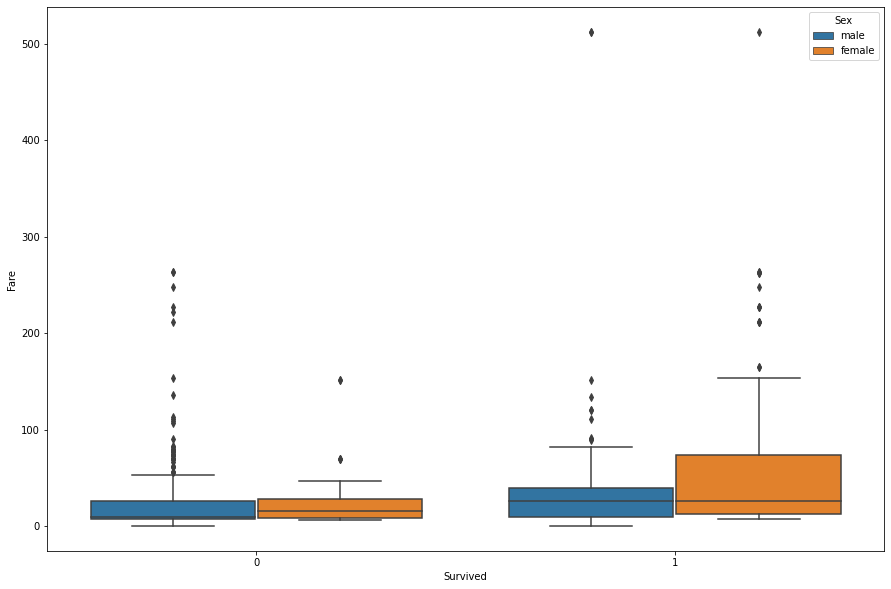

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Survived",y="Fare",data=train,hue="Sex")
#by looking the plot we can observe that who bought costlier ticket survived ,that of 1st and 2nd class ,might due to structure of the titanic,assuming 1st and 2nd class upper floors 
#among them females holding costlier  ticekts survived more in count

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

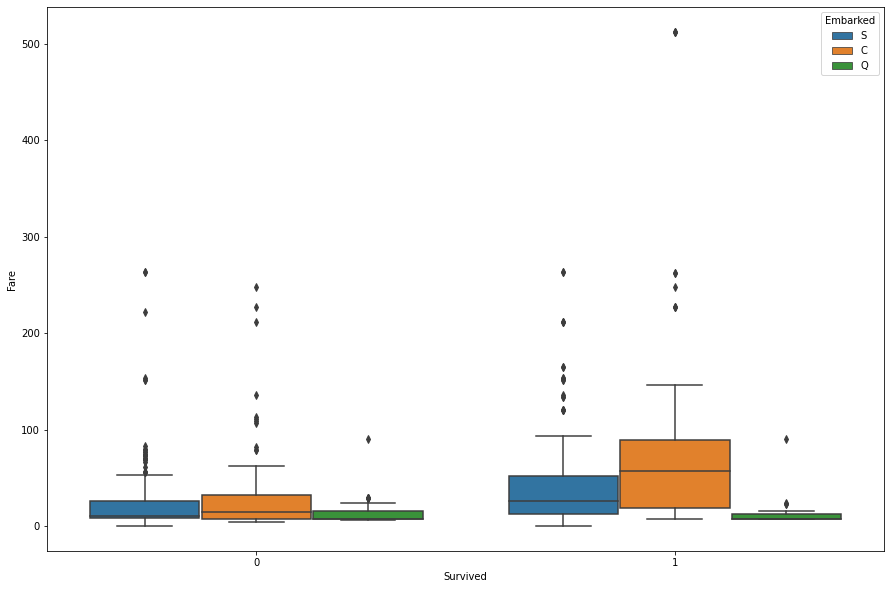

In [26]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Survived",y="Fare",data=train,hue="Embarked")

<AxesSubplot:xlabel='Survived', ylabel='Age'>

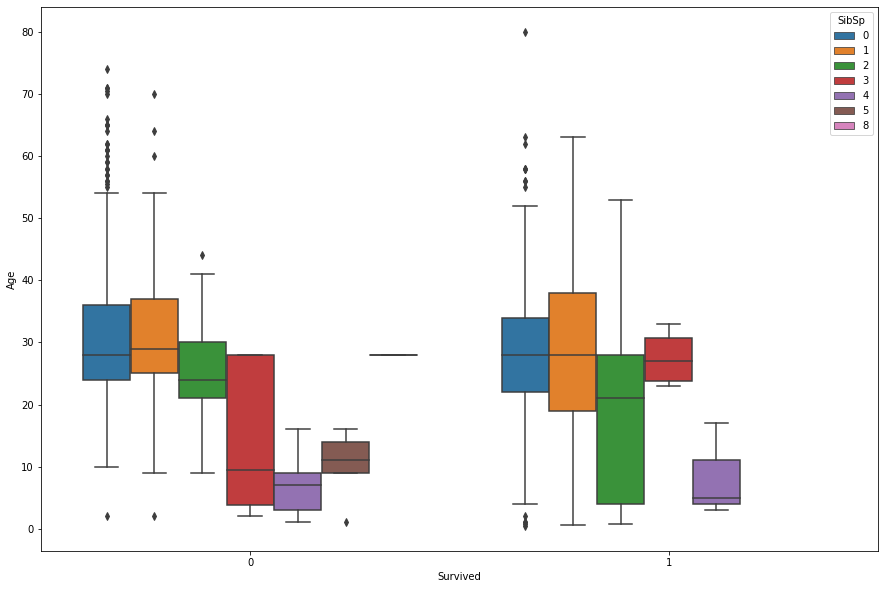

In [27]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Survived",y="Age",data=train,hue="SibSp")
#people who were spouse or sib with  age group 19-45 survived more compared to others

In [28]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# **Feature Addition**

In [29]:
train["Total_Family_Members"]=train["SibSp"]+train["Parch"]
#adding feature total family members 

<AxesSubplot:xlabel='Total_Family_Members', ylabel='count'>

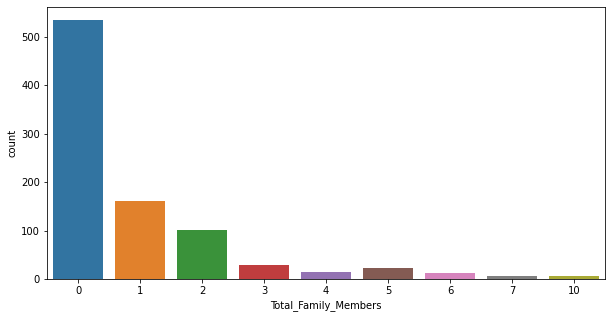

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(train["Total_Family_Members"])#we can observe most of the people visited alone

In [31]:
train["Title"]=train["Name"].apply(lambda x : x.split(",")[1].split(".")[0])
#Adding the feature title 

 Mr              517
 Miss            181
 Mrs             124
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Col               2
 Major             2
 Don               1
 Capt              1
 Lady              1
 the Countess      1
 Jonkheer          1
 Mme               1
 Sir               1
 Ms                1
Name: Title, dtype: int64


<AxesSubplot:xlabel='Title', ylabel='count'>

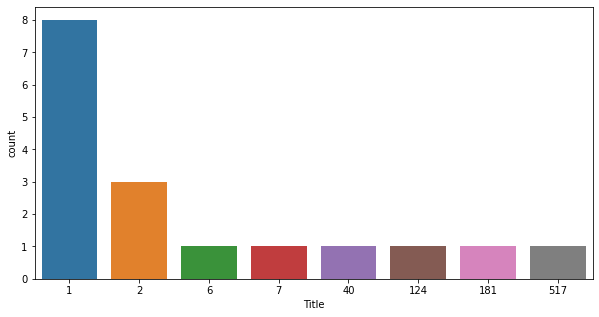

In [32]:
print(train["Title"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(train["Title"].value_counts())

In [33]:
train["Last_name"]=train["Name"].apply(lambda x : x.split(",")[0])
#Adding the feature last name so that we can compute from family name 

Andersson    9
Sage         7
Skoog        6
Carter       6
Johnson      6
            ..
Cavendish    1
Leinonen     1
Elsbury      1
Davis        1
Mionoff      1
Name: Last_name, Length: 665, dtype: int64


<AxesSubplot:xlabel='Last_name', ylabel='count'>

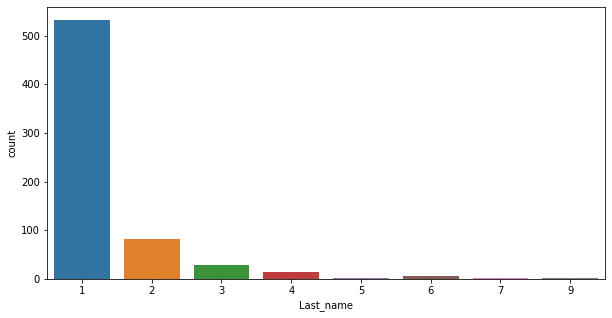

In [34]:
plt.figure(figsize=(10,5))
print(train.Last_name.value_counts())
sns.countplot(train["Last_name"].value_counts())
#assuming that people of same last name might be family

# **Model Preparation**

In [35]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Total_Family_Members,Title,Last_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Mr,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Mrs,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Miss,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Mrs,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Mr,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,Rev,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,Miss,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,3,Miss,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,Mr,Behr


In [36]:
#removing unwanted columns
train_new=train.drop(["PassengerId","Name","SibSp","Parch","Ticket","Title","Last_name"],axis=1)
#we can usderstand from above plots that Lastname and Title might not be that useful,so ddroping

In [37]:
train_new

,Survived,Pclass,Sex,Age,Fare,Embarked,Total_Family_Members
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,0
887,1,1,female,19.0,30.0000,S,0
888,0,3,female,28.0,23.4500,S,3
889,1,1,male,26.0,30.0000,C,0


In [38]:
le=LabelEncoder()
train_new["Sex"]=le.fit_transform(train_new["Sex"])
train_new["Embarked"]=le.fit_transform(train_new["Embarked"])
train_new
#transformed the string value into numeric using label encoder

,Survived,Pclass,Sex,Age,Fare,Embarked,Total_Family_Members
0,0,3,1,22.0,7.2500,2,1
1,1,1,0,38.0,71.2833,0,1
2,1,3,0,26.0,7.9250,2,0
3,1,1,0,35.0,53.1000,2,1
4,0,3,1,35.0,8.0500,2,0
...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,2,0
887,1,1,0,19.0,30.0000,2,0
888,0,3,0,28.0,23.4500,2,3
889,1,1,1,26.0,30.0000,0,0


In [39]:
train_new.describe()#we can observe that columns are in different scales

,Survived,Pclass,Sex,Age,Fare,Embarked,Total_Family_Members
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.315152,32.096681,1.535433,0.906637
std,0.486260,0.834700,0.477538,12.984932,49.697504,0.792088,1.614703
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.895800,1.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,14.454200,2.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,2.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,2.000000,10.000000


In [40]:
#input output distribution
X=train_new.drop("Survived",axis=1)
y=train_new[["Survived"]]
print(X.shape)
print(y.shape)

(889, 6)
(889, 1)


In [41]:
scaled=pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)
scaled#input data is scaled 
X=scaled

In [42]:
#spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape,"X_train shape")
print(X_test.shape,"X_test shape")
print(y_train.shape,"y_train shape")
print(y_test.shape,"y_test shape")



(711, 6) X_train shape
(178, 6) X_test shape
(711, 1) y_train shape
(178, 1) y_test shape


In [43]:
gc.collect()#clearing memory

572450

In [44]:
#lets check the distribution of data to find balance and imbalance
print(round((train["Survived"]==0).sum()/len(train.index)*100,2),"% of people not survived")
print(round((train["Survived"]==1).sum()/len(train.index)*100,2),"% of people survived")
#almost 60:40 ratio of data,considering to be balnced

61.75 % of people not survived
38.25 % of people survived


In [45]:
#fitting the models and predicting the accuracy scores of default models and cross validation scores as well
model=[LogisticRegression(),DecisionTreeClassifier(),GaussianNB(),SVC(),KNeighborsClassifier(),
      RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier()]
model_score=pd.DataFrame(columns=["Model","Accuracy","CV_Mean_Accuracy"])
folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
for m in model:
    m.fit(X_train,y_train)
    pred=m.predict(X_test)
    print("Accuracy score of {} model is".format(m),accuracy_score(y_test,pred),"\n")
    cv=cross_val_score(estimator=m,X=X,y=y,scoring="accuracy",cv=folds)
    print("Cross validation score of {} model is ".format(m),list(cv),"\n")
    print("Mean score of cross validation of {} model is ".format(m),cv.mean(),"\n")
    print("confusion matrix for{} model".format(m),"\n",confusion_matrix(y_test,pred))
    print("\n",classification_report(y_test,pred))
    print("------------------------------------------------------------------------------------")
    print("\n")
    model_score=model_score.append([{"Model":m,"Accuracy":accuracy_score(y_test,pred),"CV_Mean_Accuracy":cv.mean()}],ignore_index=True)

Accuracy score of LogisticRegression() model is 0.7752808988764045 

Cross validation score of LogisticRegression() model is  [0.7921348314606742, 0.797752808988764, 0.7808988764044944, 0.8089887640449438, 0.7796610169491526] 

Mean score of cross validation of LogisticRegression() model is  0.7918872595696059 

confusion matrix forLogisticRegression() model 
 [[85 24]
 [16 53]]

               precision    recall  f1-score   support

           0       0.84      0.78      0.81       109
           1       0.69      0.77      0.73        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178

------------------------------------------------------------------------------------


Accuracy score of DecisionTreeClassifier() model is 0.7528089887640449 

Cross validation score of DecisionTreeClassifier() model is  [0.8202247191011236, 0.8033707865168539, 0.7303370786516854, 0.79775

In [46]:
model_score

,Model,Accuracy,CV_Mean_Accuracy
0,LogisticRegression(),0.775281,0.791887
1,DecisionTreeClassifier(),0.752809,0.788529
2,GaussianNB(),0.775281,0.793030
3,SVC(),0.831461,0.824529
4,KNeighborsClassifier(),0.797753,0.813286
5,"(DecisionTreeClassifier(max_features='auto', r...",0.764045,0.814404
6,"(DecisionTreeClassifier(max_depth=1, random_st...",0.797753,0.812163
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.814607,0.836914
8,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.808989,0.817806


In [47]:
#by looking at crossvalidation scores we can conclude that Gradient Boosting classifier has outperformed 
#second one is svc

In [48]:
#hyper parametre tuning for Gradient boostting 
model=GradientBoostingClassifier()
param_grid={"learning_rate":[0.01,0.1,0.2],"n_estimators":[100,500,1000],"max_depth":[2,3],
           'min_samples_leaf': range(100, 400, 200),
                          'min_samples_split': range(200, 500, 200)}
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring="accuracy",
                 cv=folds)
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [2, 3],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

In [49]:
print(grid.best_params_)

{'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 1000}


In [50]:
model=GradientBoostingClassifier(learning_rate = 0.2, max_depth= 3, min_samples_leaf= 100, 
                                 min_samples_split= 200, n_estimators= 1000)
model.fit(X_train,y_train)
pred=model.predict(X_test)
print(accuracy_score(y_test,pred),"accuracy of model is")
score=cross_val_score(estimator=model,X=X,y=y,cv=folds,scoring="accuracy")
print(score)
print(score.mean())
#minimum accuracy will be 0.81460674 and max will be 0.84180791

0.8314606741573034 accuracy of model is
[0.81460674 0.82022472 0.81460674 0.83146067 0.84180791]
0.8245413572018029


In [51]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.86      0.87      0.86       109
           1       0.79      0.77      0.78        69

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



Text(0.5, 1.0, 'Confusion matrix of Gradient Boosting Algorithm')

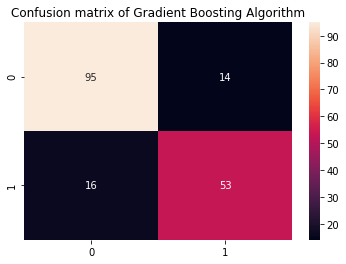

In [52]:
#visualizing the confusion matrix of final model
matrix=confusion_matrix(y_test,pred)
sns.heatmap(matrix,annot=True)
plt.title("Confusion matrix of Gradient Boosting Algorithm")

				 Important features of Gradient Boosting
				******************************************
				    Accuracy of the Model is  82.45 %


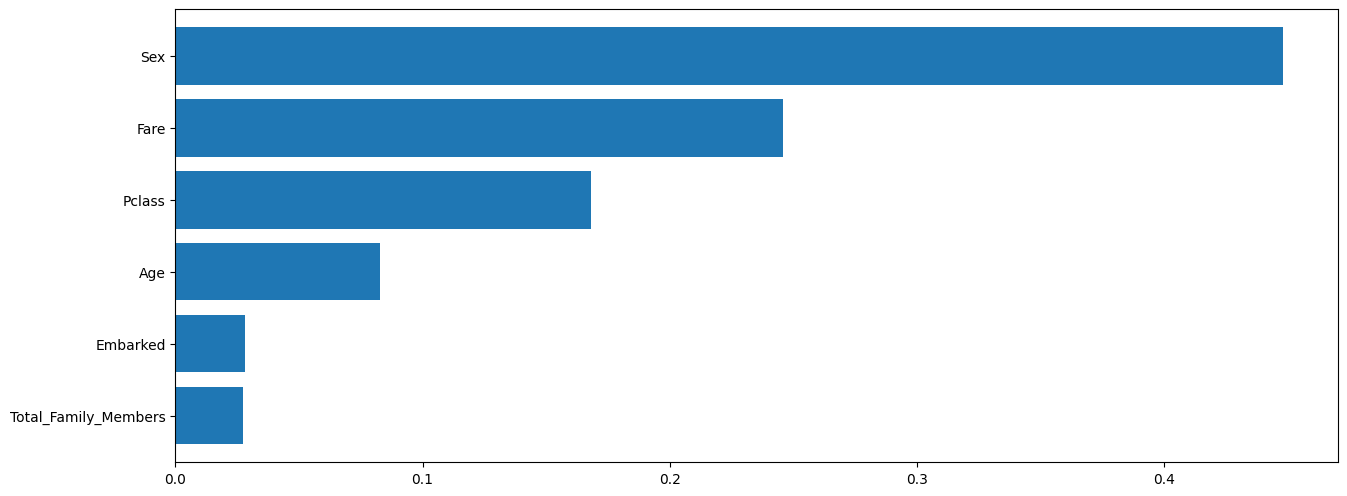

In [53]:
print("\t\t\t\t","Important features of Gradient Boosting")
plt.figure(figsize=(15,6),dpi=100)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('\t\t\t\t******************************************')
print("\t\t\t\t    Accuracy of the Model is ",round(score.mean()*100,2),"%")

# **SUBMISSIONS**

**Using our Final Gradient Boosting model predicting the test data set**

In [54]:
test=pd.read_csv("../input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
test.isnull().sum()#checking for null values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [56]:
#making the data set just like out training data set to test the model 
test.drop([ 'Name','Ticket','Cabin'],axis=1,inplace=True)
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [57]:
test["Age"].fillna(value=test["Age"].median(),inplace=True)
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,27.0,0,0,8.0500,S


In [58]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [59]:
#missing values filled and removed
test["Fare"].fillna(value=test["Fare"].median(),inplace=True)
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [60]:
le=LabelEncoder()
test["Embarked"]=le.fit_transform(test["Embarked"])
test["Sex"]=le.fit_transform(test["Sex"])
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0,8.0500,2
414,1306,1,0,39.0,0,0,108.9000,0
415,1307,3,1,38.5,0,0,7.2500,2
416,1308,3,1,27.0,0,0,8.0500,2


In [61]:
test["Total_Family_Members"]=test["SibSp"]+test["SibSp"]
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Total_Family_Members
0,892,3,1,34.5,0,0,7.8292,1,0
1,893,3,0,47.0,1,0,7.0000,2,2
2,894,2,1,62.0,0,0,9.6875,1,0
3,895,3,1,27.0,0,0,8.6625,2,0
4,896,3,0,22.0,1,1,12.2875,2,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0,8.0500,2,0
414,1306,1,0,39.0,0,0,108.9000,0,0
415,1307,3,1,38.5,0,0,7.2500,2,0
416,1308,3,1,27.0,0,0,8.0500,2,0


In [62]:
#storing the passneger id of test data to use later 
Passenger_Id=test["PassengerId"]
Passenger_Id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [63]:
test.drop("PassengerId",axis=1,inplace=True)
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Total_Family_Members
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,2,2
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,2,0
4,3,0,22.0,1,1,12.2875,2,2
...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2,0
414,1,0,39.0,0,0,108.9000,0,0
415,3,1,38.5,0,0,7.2500,2,0
416,3,1,27.0,0,0,8.0500,2,0


In [64]:
test.drop(["SibSp","Parch"],axis=1,inplace=True)
test

,Pclass,Sex,Age,Fare,Embarked,Total_Family_Members
0,3,1,34.5,7.8292,1,0
1,3,0,47.0,7.0000,2,2
2,2,1,62.0,9.6875,1,0
3,3,1,27.0,8.6625,2,0
4,3,0,22.0,12.2875,2,2
...,...,...,...,...,...,...
413,3,1,27.0,8.0500,2,0
414,1,0,39.0,108.9000,0,0
415,3,1,38.5,7.2500,2,0
416,3,1,27.0,8.0500,2,0


In [65]:
#scaling the data
scaled=pd.DataFrame(StandardScaler().fit_transform(test),columns=test.columns)
scaled

,Pclass,Sex,Age,Fare,Embarked,Total_Family_Members
0,0.873482,0.755929,0.386231,-0.497413,-0.470915,-0.499470
1,0.873482,-1.322876,1.371370,-0.512278,0.700767,0.616992
2,-0.315819,0.755929,2.553537,-0.464100,-0.470915,-0.499470
3,0.873482,0.755929,-0.204852,-0.482475,0.700767,-0.499470
4,0.873482,-1.322876,-0.598908,-0.417492,0.700767,0.616992
...,...,...,...,...,...,...
413,0.873482,0.755929,-0.204852,-0.493455,0.700767,-0.499470
414,-1.505120,-1.322876,0.740881,1.314435,-1.642598,-0.499470
415,0.873482,0.755929,0.701476,-0.507796,0.700767,-0.499470
416,0.873482,0.755929,-0.204852,-0.493455,0.700767,-0.499470


In [66]:
#predicting using the model
predictions=model.predict(scaled)
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [67]:
submissions=pd.DataFrame()
submissions["PassengerId"]=Passenger_Id
submissions["Survived"]=predictions

In [68]:
submissions.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [2]:
submissions.to_csv("submissions", index=False)